In [1]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


In [3]:
# CNN Based Model in Keras

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [6]:
# Train From Scratch !!

In [7]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [8]:
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    "CovidDataset/Train",
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 224 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_datagen.flow_from_directory(
    "CovidDataset/Val",
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 60 images belonging to 2 classes.


In [12]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=8,
    validation_data= validation_generator,
    validation_steps=2
)

Epoch 1/8
8/8 [==============================] - 36s 5s/step - loss: 1.3584 - accuracy: 0.5703 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 2/8
8/8 [==============================] - 36s 5s/step - loss: 0.6201 - accuracy: 0.6562 - val_loss: 0.5639 - val_accuracy: 0.9333
Epoch 3/8
8/8 [==============================] - 36s 4s/step - loss: 0.5288 - accuracy: 0.7500 - val_loss: 0.4481 - val_accuracy: 0.9333
Epoch 4/8
8/8 [==============================] - 36s 4s/step - loss: 0.3269 - accuracy: 0.8555 - val_loss: 0.2712 - val_accuracy: 0.9000
Epoch 5/8
8/8 [==============================] - 37s 5s/step - loss: 0.3384 - accuracy: 0.8672 - val_loss: 0.1484 - val_accuracy: 0.9667
Epoch 6/8
8/8 [==============================] - 36s 5s/step - loss: 0.2032 - accuracy: 0.9258 - val_loss: 0.1693 - val_accuracy: 0.9000
Epoch 7/8
8/8 [==============================] - 37s 5s/step - loss: 0.2574 - accuracy: 0.9180 - val_loss: 0.1423 - val_accuracy: 0.9667
Epoch 8/8
8/8 [==========================

In [14]:
model.save("Model_Adv.h5")

In [15]:
model.evaluate_generator(train_generator)

[0.18934950232505798, 0.9732142686843872]

In [16]:
model.evaluate_generator(validation_generator)

[0.024574395269155502, 0.9833333492279053]

## Test Images

In [17]:
model = load_model("Model_Adv.h5")
print(train_generator.class_indices)
y_actual = []
y_test = []

{'Covid': 0, 'Normal': 1}


In [18]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [19]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

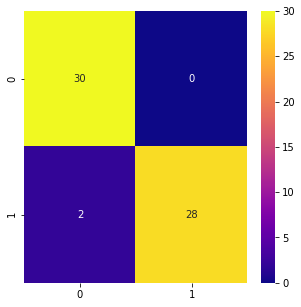

In [20]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

plt.figure(figsize=(5,5))
cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()